<a href="https://colab.research.google.com/github/moya3/test/blob/master/mySection5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART1 簡単な予測モデルを作ってみよう

## おまじない

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

## データの読み込み
- train.csvとtest.csvとsample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう
- sampleを読み込む時は、header=Noneというオプションを忘れないようにしましょう

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv', header= None)


## trainの先頭行を見てみましょう

(40, 11)
(40, 11)


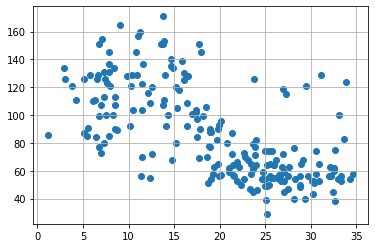

In [31]:
print(test.shape)
print(test.shape)

#plt.plot(train['temperature'], train['y'] , markersize=10)
plt.scatter(x = train['temperature'], y = train['y'])

plt.grid(True)
plt.show()

## trainから説明変数と目的変数となるデータを取り出しましょう
- 説明変数はtrainからtemperatureを選択し、変数名をtrainXとして代入しましょう
- 目的変数はtrainからyを選択し、変数名をyとして代入しましょう

In [0]:
trainX = train['temperature']
y = train['y'] 

## testから説明変数となるデータを取り出しましょう
- 説明変数はtrainと同じtemperatureを選択し、変数名をtestXとして代入しましょう

In [0]:
testX = test['temperature']


## 単回帰の場合のみ、説明変数に対しておまじないが必要となります
- 単回帰の場合はややこしいですが、train,testの説明変数ともに、データの形を整える必要があります
- 具体的にはvalues.reshape(-1,1)というおまじないをします
- 整えた後、再び変数Xに代入します

In [0]:
trainX = trainX.values.reshape(-1,1)
testX = testX.values.reshape(-1,1)


## 回帰のモデルの箱を用意しましょう
- モデルを作る為にはまず、モデルを表す箱が必ず必要になります
- 変数名をmodel1として、LR()を代入しましょう

In [0]:
model1 = LR()

## 単回帰モデルを作りましょう
- fit関数を使います
- カッコの中に、説明変数、目的変数の順番に書きます

In [57]:
model1.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 作ったモデルの傾きや切片を確かめてみましょう
- 傾きはcoef_を使います
- 切片はintercept_を使います

In [58]:
model1.coef_

array([-2.5023821])

In [59]:
model1.intercept_

134.79948383749922

## 予測をしましょう
- predict関数を使います
- 予測結果は変数predに代入しましょう

In [0]:
pred = model1.predict(testX)

In [61]:
pred

array([ 84.25136537,  74.99255159,  62.9811175 ,  80.99826864,
        79.49683938,  76.49398085,  78.49588653,  69.48731097,
        67.73564349,  95.76232304,  88.25517673,  77.24469548,
        74.99255159,  84.25136537,  96.01256125,  98.01446693,
        88.00493852,  77.99541011,  87.00398568,  85.75279463,
        85.75279463,  87.75470031,  87.5044621 ,  94.7613702 ,
        86.75374747,  84.50160358,  81.74898327,  98.01446693,
        98.76518156,  86.00303284,  95.26184662,  99.01541977,
        94.51113199,  97.51399051, 108.52447176,  97.51399051,
       106.27232787, 111.7775685 ,  97.01351409,  96.51303767])

## sampleの中身を確認してみましょう

In [62]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


## sample[1]に予測結果を代入しましょう

In [63]:
sample[1]  = pred
print(sample.shape)
print(pred.shape)


(40, 2)
(40,)


## sampleをファイルで書きだしましょう
- to_csv関数を使います
- オプションは３つあり、"submit1.csv", index=None, header=Noneを書きます

In [0]:
sample.to_csv('submit1.csv', index=None, header=None)

# 実習
1.説明変数をkcalとして、単回帰モデルを作ろう。まず、 trainとtestのkcalに欠損値があるかないか確認しよう
- 本当に欠損があるかどうか、head関数を使って確認しよう

In [66]:
train.isna().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [67]:
test.isna().sum()

datetime          0
week              0
soldout           0
name              0
kcal              4
remarks          33
event            37
payday           38
weather           0
precipitation     0
temperature       0
dtype: int64

2.trainのkcalの平均値を求め、変数avgに代入しよう

In [0]:
avg = train['kcal'].mean()



3.変数avgを使って、trainとtestのkcalの欠損値を補間し、それぞれを変数名trainXとtestXに代入してみよう

In [0]:
avg
trainX = train['kcal'].fillna(avg)
testX = test['kcal'].fillna(avg)


4.trainXとtestXをvalues.reshape(-1,1)を使って形を整え、再びtrainX, testXへ代入しよう
    1. 3番ではtrainXにはavgで補間されたtrain["kcal"]が代入される
    2. 4番では補間されたtrainXにおまじないをかけたものがtrainXに代入されることになる

In [0]:
trainX = trainX.values.reshape(-1,1)
testX = testX.values.reshape(-1,1)


5.trainからyを取り出し、変数yに代入しよう

In [0]:
y = train['y']

6.回帰モデルの箱を変数名model2として用意しよう

In [0]:
model2=LR()

7.trainXとyを使って単回帰のモデルを作ろう

In [80]:
model2.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

8.作ったモデルの傾きと切片を確認しよう

In [81]:
model2.coef_

array([0.13195178])

In [82]:
model2.intercept_

33.26061577029441

9.testXを使って予測をし、予測値を変数pred2に代入しよう

In [0]:
pred2 = model2.predict(testX)

10.sample[1]にpred2を代入しよう

In [0]:
sample[1] = pred2

11.to_csv関数のindex=Noneがある時とない時の違い、header=Noneがある時とない時の違いは何かを考えてみよう

12.sampleをファイル出力し、submit2.csvという投稿用ファイルを作ろう

In [0]:
sample.to_csv('submit2.csv', header=None, index=None)

13.submit2.csvをDeepAnalyticsに投稿して、submit1.csvのスコアを比較してみよう